## Решение задачи оценки выживаемости пассажиров на Титанике с помощью алгоритма k-средних

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
titanic = pd.read_csv("kaggle-titanic_data_train.csv")

### Обзор данных

In [3]:
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic[['age', 'name']]

,age,name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"
...,...,...
886,27.0,"Montvila, Rev. Juozas"
887,19.0,"Graham, Miss. Margaret Edith"
888,NaN,"Johnston, Miss. Catherine Helen ""Carrie"""
889,26.0,"Behr, Mr. Karl Howell"


In [5]:
titanic.loc[3:6,['ticket', 'embarked']]

,ticket,embarked
3,113803,S
4,373450,S
5,330877,Q
6,17463,S


survived    0.383838
dtype: float64

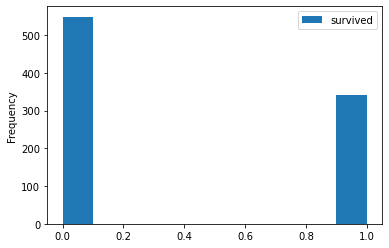

In [6]:
# Среднее значение выживаемости равно 38%
titanic[['survived']].plot.hist()
titanic[['survived']].mean()

<AxesSubplot:ylabel='Frequency'>

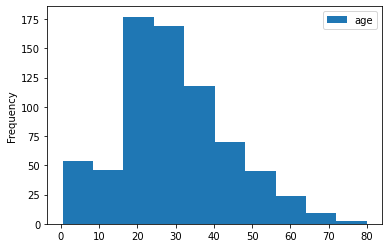

In [7]:
titanic[['age']].plot.hist()

### Предобработка данных
+ Избавимся от переменных, которых не влияют на выживание, либо которые тяжедо интерпретировать (имя, билет, кабина)
+ Превратим категориальную переменную пола в количественную
+ Избавимся от пропущенных значений

In [8]:
titanic = titanic.drop(['name', 'ticket', 'cabin'], axis=1)

In [9]:
titanic['sex'] = titanic.sex.map({"male":0, "female":1})
titanic = pd.get_dummies(titanic, dummy_na=True, columns=['embarked',])

In [10]:
titanic.dropna(inplace=True)

# Обучение модели
+ Разобьем выборку на две подвыборки (с векторами входных данных и целевым значением )
+ Разобьем подвыборки на обучающую и тестовую
+ Обучим модель
+ Проверим точность модели

In [11]:
X = titanic.drop('survived', axis=1)
y = titanic.survived

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

In [13]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print('Точность прогноза {}'.format(np.mean(y_predicted == y_test)))

Точность прогноза 0.7161016949152542


Наилучшая точность достигается при n=7